<a href="https://colab.research.google.com/github/18b01a05f4/Indian-Currency-Classifier/blob/main/CurrencyClassifier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# !unzip '/content/drive/MyDrive/Indian currency dataset v1.zip' -d '/content'
!unzip '/content/drive/MyDrive/Indian currency dataset v1.zip' -d '/content'

Archive:  /content/drive/MyDrive/Indian currency dataset v1.zip
  inflating: /content/test/100_15.jpg  
  inflating: /content/test/100_20.jpg  
  inflating: /content/test/100_270.jpg  
  inflating: /content/test/100_3.jpg  
  inflating: /content/test/100_359.jpg  
  inflating: /content/test/100_371.jpg  
  inflating: /content/test/100_4.jpg  
  inflating: /content/test/100__371.jpg  
  inflating: /content/test/100__386.jpg  
  inflating: /content/test/100__389.jpg  
  inflating: /content/test/100__415.jpg  
  inflating: /content/test/100__427.jpg  
  inflating: /content/test/100__435.jpg  
  inflating: /content/test/100__437.jpg  
  inflating: /content/test/10__206.jpg  
  inflating: /content/test/10__247.jpg  
  inflating: /content/test/10__276.jpg  
  inflating: /content/test/10__324.jpg  
  inflating: /content/test/10__358.jpg  
  inflating: /content/test/10__388.jpg  
  inflating: /content/test/10__443.jpg  
  inflating: /content/test/200.__1.jpg  
  inflating: /content/test/200.__

In [ ]:
base_dir = os.path.join(os.getcwd(), 'Indian currency dataset v1')
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_ten_dir = os.path.join(train_dir, '10')
train_hundred_dir = os.path.join(train_dir, '100')
train_twenty_dir = os.path.join(train_dir, '20')
train_twohundred_dir = os.path.join(train_dir, '200')
train_twothousand_dir = os.path.join(train_dir, '2000')
train_fifty_dir = os.path.join(train_dir, '50')
train_fivehundred_dir = os.path.join(train_dir, '500')

In [ ]:
validation_ten_dir = os.path.join(validation_dir, '10')
validation_hundred_dir = os.path.join(validation_dir, '100')
validation_twenty_dir = os.path.join(validation_dir, '20')
validation_twohundred_dir = os.path.join(validation_dir, '200')
validation_twothousand_dir = os.path.join(validation_dir, '2000')
validation_fifty_dir = os.path.join(validation_dir, '50')
validation_fivehundred_dir = os.path.join(validation_dir, '500')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255
) 

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

In [ ]:
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(2, 2))

In [ ]:
classifier.add(Dropout(0.3))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units=512, activation='relu'))

In [ ]:
classifier.add(Dense(units=8, activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 128)       1

In [ ]:
training_set = train_datagen.flow_from_directory(
    batch_size=100,
    directory='./training',
    shuffle=True,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 3566 images belonging to 8 classes.


In [ ]:
print(training_set.image_shape)

(150, 150, 3)


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# training_set = datagen.flow_from_directory(
#     batch_size=50,
#     directory='./training',
#     target_size=(150, 150),
#     class_mode='categorical'
# )

Found 3566 images belonging to 8 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory(
    batch_size=75,
    directory='./validation',
    target_size=(150, 150),
    class_mode='categorical'
)

Found 345 images belonging to 8 classes.


In [ ]:
num_ten_tr = len(os.listdir('./training/10')) 
num_ten_val = len(os.listdir('./validation/10')) 

num_twenty_tr = len(os.listdir('./training/20')) 
num_twenty_val = len(os.listdir('./validation/20'))

num_hundred_tr = len(os.listdir('./training/100')) 
num_hundred_val = len(os.listdir('./validation/100'))

num_twohundred_tr = len(os.listdir('./training/200')) 
num_twohundred_val = len(os.listdir('./validation/200'))

num_twothousand_tr = len(os.listdir('./training/2000')) 
num_twothousand_val = len(os.listdir('./validation/2000'))

num_fifty_tr = len(os.listdir('./training/50')) 
num_fifty_val = len(os.listdir('./validation/50'))

num_fivehundred_tr = len(os.listdir('./training/500')) 
num_fivehundred_val = len(os.listdir('./validation/500'))

total_train = num_ten_tr + num_twenty_tr + num_hundred_tr + num_twohundred_tr + num_twothousand_tr + num_fifty_tr + num_fivehundred_tr
total_val = num_ten_val + num_twenty_val + num_hundred_val + num_twohundred_val + num_twothousand_val + num_fifty_val + num_fivehundred_val

In [ ]:
print(total_train,total_val)

3173 315


In [ ]:
try:
    history = classifier.fit_generator(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=25,
        validation_data=validation_set,
        validation_steps=len(validation_set)
    )
except Exception as e:
    print(e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/25
 7/36 [====>.........................] - ETA: 2:46 - loss: 2.2781 - accuracy: 0.1414

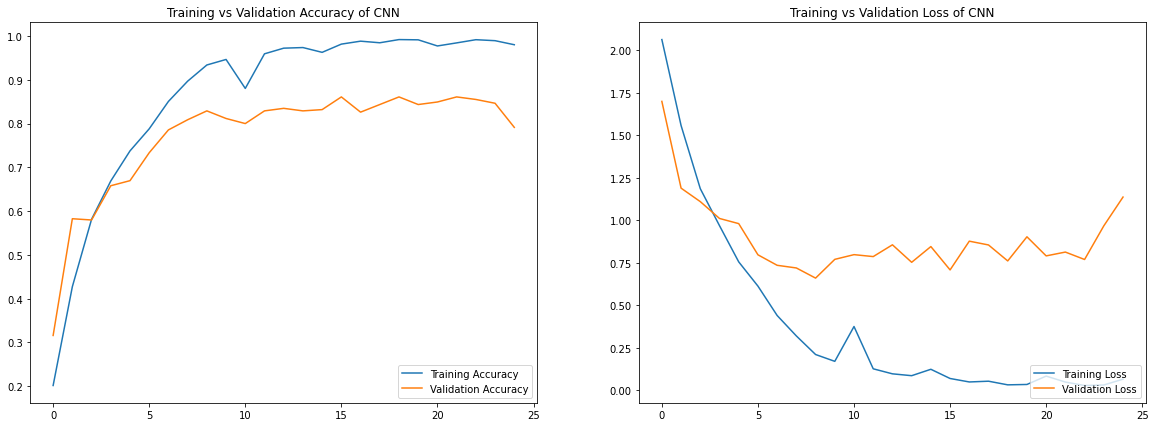

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy of CNN")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training vs Validation Loss of CNN")

plt.show()
plt.close()

In [ ]:
classifier.save('model.h5')

In [ ]:
new_model = tf.keras.models.load_model('currency.model')